# Stratification

First we want to load our package with `using`, we will also want some Catlab utilities.

In [1]:
using AlgebraicMetabolism
using Catlab
using Catlab.ACSets
using Catlab.CategoricalAlgebra
using Catlab.CategoricalAlgebra.CSets
using Catlab.Graphics
using Catlab.Graphics.Graphviz
using Test



M = @acset MetabolicNet begin
  V = 2
  E₁ = 3
  E₂ = 3

  src₁ = [1,2,1]
  tgt₁ = [1,2,2]

  src₂ = [1,2,1]
  tgt₂ = [1,2,2]
end

E₁,src₁,tgt₁
1,1,1
2,2,2
3,1,2
E₂,src₂,tgt₂
1,1,1
2,2,2
3,1,2


Now we can compute the product model to get a model with 2×2=4 states.

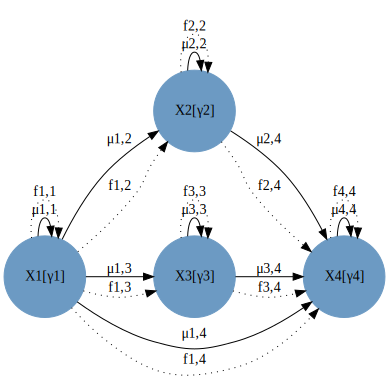

In [2]:
M² = product(M,M)
to_graphviz(default_attrs(apex(M²)))

We need to propagate the attributes from the factor models to the product model.
We start with the attributes for the original two models.

In [3]:
P = ReactionMetabolicNet{Rational}()
copy_parts!(P, apex(M²))
vnames₁ = [:x1, :x2]
γ₁ = [1//2, 1//3]
μ₁ = [2,3,5]
f₁ = [1,2,3]

vnames₂ = [:a, :b]
γ₂ = [7//2, 7//3]
μ₂ = 11*[2,3,5]
f₂ = [1,2,3]/2

3-element Vector{Float64}:
 0.5
 1.0
 1.5

The names get composed by tupling.

In [4]:
π₁, π₂ = legs(M²)
for v in parts(P, :V)
  P[v, :vname] = Symbol("($(vnames₁[π₁[:V](v)]),$(vnames₂[π₂[:V](v)]))")
  P[v, :γ] = γ₁[π₁[:V](v)]*γ₂[π₂[:V](v)]
end

The coefficients multiply

In [5]:
for e in parts(P, :E₁)
  P[e, :μ] = μ₁[π₁[:E₁](e)]*μ₂[π₂[:E₁](e)]
end

The exponents add

In [6]:
for e in parts(P, :E₂)
  P[e, :f] = f₁[π₁[:E₂](e)]+f₂[π₂[:E₂](e)]
end

And the resulting model can be drawn. Notice the symmetry in both the structure, and the numbers.

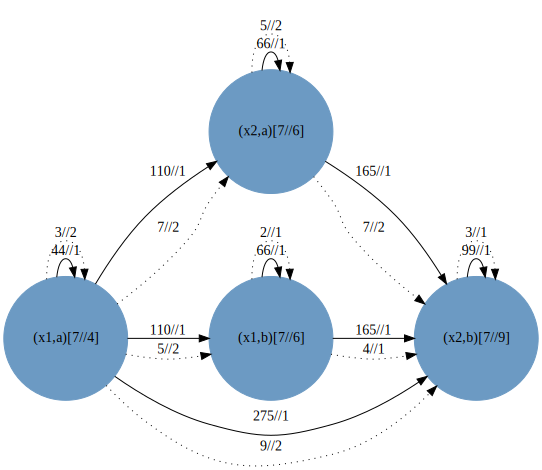

In [7]:
to_graphviz(P)